# Spectral Analysis Project

The aim of this project is to explore how information from galactic spectra can be extracted using machine learning and how it can determine important physical quantities.


In [289]:
# Importing libraries
# Basics 
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Visualizaton 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, train_test_split, cross_val_score, validation_curve, cross_val_predict, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, recall_score, fbeta_score

## EDA - Exploratory data analysis 

### The dataset 

Downolading the raw dataset I created and downloaded with the CasJobs interface as a csv file. 
The dataset is not filtered and cleaned, and so we proceed with the cleaning and the EDA.

The dataset is the result of the merging of SpecObj and PhotoObj tables on the same attribute (specObjID) : 
- PhotoObj contains Photometric data
- SpecObj contains spectroscopic data

In [161]:
# Converting the csv into a pandas dataframe 
raw_df = pd.read_csv('/Users/emmatosato/Documents/UNI Locale/Erasmus/Data Mining and Machine Learning/Spectral-AnalysisProject/SDSS_dataset.csv')

### Raw dataset insights

In [162]:
raw_df.shape

(10000, 704)

In [163]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 704 entries, objID to img
dtypes: float64(557), int64(132), object(15)
memory usage: 53.7+ MB


In [164]:
raw_df.head(100)

objID  skyVersion   run  rerun  camcol  field  obj  mode  \
0   1237674650460684416           2  6793    301       4     55  128     1   
1   1237674650460684446           2  6793    301       4     55  158     1   
2   1237674650460684511           2  6793    301       4     55  223     1   
3   1237674650460684544           2  6793    301       4     55  256     1   
4   1237674650460749979           2  6793    301       4     56  155     1   
..                  ...         ...   ...    ...     ...    ...  ...   ...   
95  1237648720141877432           2   756    301       1    198  184     1   
96  1237648720141877472           2   756    301       1    198  224     1   
97  1237648720141943039           2   756    301       1    199  255     1   
98  1237648720141943050           2   756    301       1    199  266     1   
99  1237648720141943100           2   756    301       1    199  316     1   

    nChild  type  ...  elodieLogG  elodieFeH   elodieZ  elodieZErr  \
0        0     6  ...        4.49       -1.7  0.000024    0.000008   
1        0     3  ...        0.00        0.0  0.000000    0.000000   
2        0     3  ...        0.00        0.0  0.000000    0.000000   
3        0     3  ...        0.00        0.0  0.000000    0.000000   
4        0     3  ...        0.00        0.0  0.000000    0.000000   
..     ...   ...  ...         ...        ...       ...         ...   
95       0     3  ...        0.00        0.0  0.000000    0.000000   
96       0     3  ...        0.00        0.0  0.000000    0.000000   
97       0     3  ...        0.00        0.0  0.000000    0.000000   
98       0     3  ...        0.00        0.0  0.000000    0.000000   
99       0     3  ...        0.00        0.0  0.000000    0.000000   

    elodieZModelErr  elodieRChi2  elodieDOF         Column9  Column10  \
0          0.000002     0.889679       2137  15401755927646      5067   
1          0.000000     0.000000          0  15449011177454      5067   
2          0.000000     0.000000          0  15448999163844      5067   
3          0.000000     0.000000          0  15401755241894      5067   
4          0.000000     0.000000          0  15401766686400      5067   
..              ...          ...        ...             ...       ...   
95         0.000000     0.000000          0  10522837970854      5067   
96         0.000000     0.000000          0  10523572792087      5067   
97         0.000000     0.000000          0  10522853496825      5067   
98         0.000000     0.000000          0  10522845005953      5067   
99         0.000000     0.000000          0  10522848797314      5067   

              img  
0   System.Byte[]  
1   System.Byte[]  
2   System.Byte[]  
3   System.Byte[]  
4   System.Byte[]  
..            ...  
95  System.Byte[]  
96  System.Byte[]  
97  System.Byte[]  
98  System.Byte[]  
99  System.Byte[]  

[100 rows x 704 columns]

In [165]:
raw_df.tail(10)

objID  skyVersion   run  rerun  camcol  field  obj  mode  \
9990  1237674650460356844           2  6793    301       4     50  236     1   
9991  1237674650460553274           2  6793    301       4     53   58     1   
9992  1237674650460422277           2  6793    301       4     51  133     1   
9993  1237674650460553318           2  6793    301       4     53  102     1   
9994  1237674650460750003           2  6793    301       4     56  179     1   
9995  1237674650460422444           2  6793    301       4     51  300     1   
9996  1237674650460553354           2  6793    301       4     53  138     1   
9997  1237674650460553364           2  6793    301       4     53  148     1   
9998  1237674650460553396           2  6793    301       4     53  180     1   
9999  1237674650460618904           2  6793    301       4     54  152     1   

      nChild  type  ...  elodieLogG  elodieFeH  elodieZ  elodieZErr  \
9990       0     3  ...         0.0        0.0      0.0         0.0   
9991       0     3  ...         0.0        0.0      0.0         0.0   
9992       0     3  ...         0.0        0.0      0.0         0.0   
9993       0     3  ...         0.0        0.0      0.0         0.0   
9994       0     3  ...         0.0        0.0      0.0         0.0   
9995       0     3  ...         0.0        0.0      0.0         0.0   
9996       0     3  ...         0.0        0.0      0.0         0.0   
9997       0     3  ...         0.0        0.0      0.0         0.0   
9998       0     3  ...         0.0        0.0      0.0         0.0   
9999       0     6  ...         0.0        0.0      0.0         0.0   

      elodieZModelErr  elodieRChi2  elodieDOF         Column9  Column10  \
9990              0.0          0.0          0  15431855202684      5067   
9991              0.0          0.0          0  15431826462671      5067   
9992              0.0          0.0          0  15431857736234      5067   
9993              0.0          0.0          0  15431881131486      5067   
9994              0.0          0.0          0  15401768998482      5067   
9995              0.0          0.0          0  15431865054797      5067   
9996              0.0          0.0          0  15431827378494      5067   
9997              0.0          0.0          0  15431830114914      5067   
9998              0.0          0.0          0  15431827585021      5067   
9999              0.0          0.0          0  15448997512553      5067   

                img  
9990  System.Byte[]  
9991  System.Byte[]  
9992  System.Byte[]  
9993  System.Byte[]  
9994  System.Byte[]  
9995  System.Byte[]  
9996  System.Byte[]  
9997  System.Byte[]  
9998  System.Byte[]  
9999  System.Byte[]  

[10 rows x 704 columns]

### Null values 

In [166]:
# Check the NaN values in the datset
v = raw_df.isnull().sum()

# Mask for finding the non zero values in the v vector crated (so the columns which contain NaN values)
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

run1d              10000
subClass            5299
class_noqso        10000
subClass_noqso     10000
comments_person    10000
tFile                 11
elodieFileName      9138
elodieObject        9138
elodieSpType        9138
dtype: int64

I will drop the run1d, class_noqso, subClass_noqso and comments_person because all the rows are NaN values. I will delete also the subClass, elodieFileName, elodieObject and elodieSpType because the contain too many null values too.

The tFile attribute has only 11 NaN values, so i will directly drop the 11 rows that have this attribute null instead of imputing the missing values (tFile is a column which contains the *"File name of best fit template source"*). Since i have a large dataset, this action should not influence the analysis.

In [167]:
# Dropping the columns
df = raw_df.copy()
df.drop(columns=['run1d', 'subClass', 'class_noqso', 'subClass_noqso', 'comments_person', 'elodieFileName', 'elodieObject', 'elodieSpType'], inplace = True)

In [168]:
# Dropping the rows
df.dropna(inplace= True)

In [169]:
# Cheking if everthing worked well
v = df.isnull().sum()
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

Series([], dtype: int64)

In [170]:
df.shape

(9989, 696)

### Duplicated rows

With this step, no duplicate rows should be found, because the dataset should already be full of unique objects.

In [171]:
df[df.duplicated() == True]

Empty DataFrame
Columns: [objID, skyVersion, run, rerun, camcol, field, obj, mode, nChild, type, clean, probPSF, insideMask, flags, rowc, rowcErr, colc, colcErr, rowv, rowvErr, colv, colvErr, rowc_u, rowc_g, rowc_r, rowc_i, rowc_z, rowcErr_u, rowcErr_g, rowcErr_r, rowcErr_i, rowcErr_z, colc_u, colc_g, colc_r, colc_i, colc_z, colcErr_u, colcErr_g, colcErr_r, colcErr_i, colcErr_z, sky_u, sky_g, sky_r, sky_i, sky_z, skyIvar_u, skyIvar_g, skyIvar_r, skyIvar_i, skyIvar_z, psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z, psfMagErr_u, psfMagErr_g, psfMagErr_r, psfMagErr_i, psfMagErr_z, fiberMag_u, fiberMag_g, fiberMag_r, fiberMag_i, fiberMag_z, fiberMagErr_u, fiberMagErr_g, fiberMagErr_r, fiberMagErr_i, fiberMagErr_z, fiber2Mag_u, fiber2Mag_g, fiber2Mag_r, fiber2Mag_i, fiber2Mag_z, fiber2MagErr_u, fiber2MagErr_g, fiber2MagErr_r, fiber2MagErr_i, fiber2MagErr_z, petroMag_u, petroMag_g, petroMag_r, petroMag_i, petroMag_z, petroMagErr_u, petroMagErr_g, petroMagErr_r, petroMagErr_i, petroMagErr_z, psfFlux_u, psfFlux_g, psfFlux_r, psfFlux_i, psfFlux_z, psfFluxIvar_u, psfFluxIvar_g, psfFluxIvar_r, ...]
Index: []

[0 rows x 696 columns]

### Data exploration

On the skyserver website it is possible to access to useful informations and explanations of the SDSS data. 
On this link you can find the description of all the columns of the dataset, both for SpecObj and PhotoObj tables, which I merged before the downolading : https://skyserver.sdss.org/dr18/MoreTools/browser

I will select a subset of columns i found relevant for data exploration.

#### Type attribute

In the table *PhotoObj* the **type** column is the: type classification of the object (star, galaxy, cosmic ray, etc.). This column typically provides the overall or general classification of an astronomical object based on its spectral characteristics and other properties.

In [172]:
df['type'].value_counts()

3    8613
6    1363
0      13
Name: type, dtype: int64

Type:
- 3 = Galaxy 
- 6 = Star
- 0 = Unknown

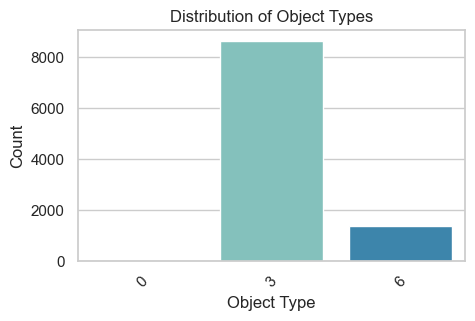

In [173]:
plt.figure(figsize=(5, 3))  # Optional: Adjust the figure size
sns.countplot(data=df, x='type', palette = 'GnBu')
plt.title("Distribution of Object Types")
plt.xlabel("Object Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In the table *PhotoObj* the **type_u** column is the: object type classification per band, which classificates based on observations made in specific wavelength bands. It should allow a more detailed analysis. Let's compare the 2 attributes.

In [174]:
# Concatenate the two Series into a DataFrame
types_df = pd.concat([df['type'].value_counts(), df['type_u'].value_counts()], axis=1)

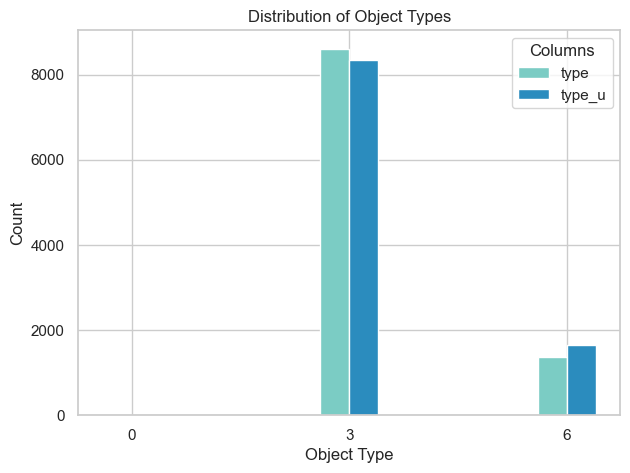

In [175]:
# Create a bar plot
plt.figure(figsize=(7, 5))

# Set the positions for the bars for 'type' and 'type_u'
bar_width = 0.4  # Width of each bar
index = types_df.index
index_type_u = [i + bar_width for i in index]

# Plot 'type' and 'type_u' counts side by side
plt.bar(index, types_df['type'], width=bar_width, color='#7bccc4', label='type')
plt.bar(index_type_u, types_df['type_u'], width=bar_width, color='#2b8cbe', label='type_u')

# Customize the plot
plt.title("Distribution of Object Types")
plt.xlabel("Object Type")
plt.ylabel("Count")
plt.legend(title="Columns")
plt.xticks(index + bar_width / 2, index)  # Position x-axis labels between bars

# Show the plot
plt.show()


We can see only a little difference.

#### Red shift attribute (z)

First, I will look for outliers.

In [176]:
# Calculate Z-scores on the the z column
z_scores = stats.zscore(df['z'])

# Identify outliers based on Z-scores
outliers = (z_scores > 3) | (z_scores < -3)

In [177]:
# Outliers
df[outliers == True]['z'].value_counts()

-9999.0    16
Name: z, dtype: int64

A redshift value of -9999 is typically used as sentinel value to indicate missing or undefined data in the context of astronomical observations.

When you encounter a redshift value of -9999, it generally means one of the following:
- Missing Data
- Placeholder Value
- Data Quality Flag

In summary, a redshift value of -9999 is not a valid redshift measurement but rather a way to handle missing or problematic data in astronomical datasets.

For these reasons, we delete the rows which contain this value for the redshift.

In [178]:
# Drop rows corresponding to outliers
df.drop(df[outliers].index, inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

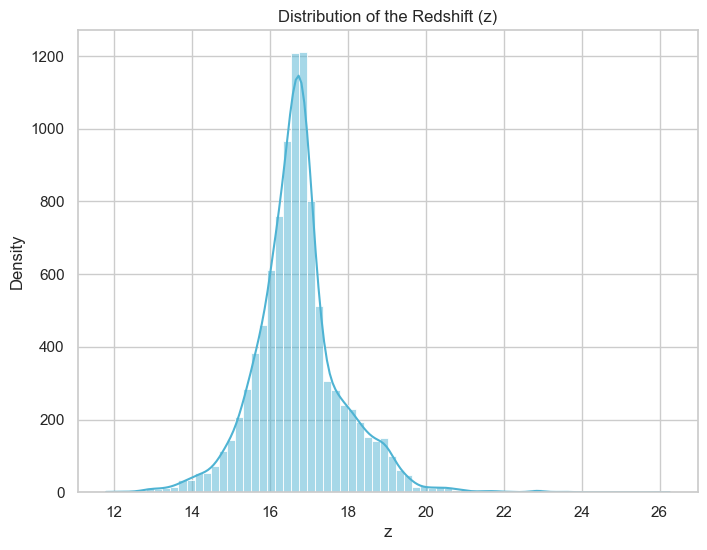

In [179]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a distribution plot using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['z'], bins=70, color = '#4eb3d3', kde=True)
plt.title("Distribution of the Redshift (z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

#### Magnitude attributes

Here box plots are created to visualize the distribution of various magnitude columns, in order to find the eventual outliers.

I reported different types of magnitudes that are used in astronomical analysis to account for the diverse characteristics of celestial objects and the variations in their light profiles. We have:
- Point Spread Function Magnitude 
- Petrosian Magnitude
- de Vaucouleurs Magnitude
- Exponential Fit Magnitude
- Model Magnitude 
- Composite Model Magnitude

In [180]:
# Specify the columns for which you want to create box plots
columns_to_check = ['psfMag_u',  'petroMag_u', 'deVMag_u', 'expMag_u', 'modelMag_u', 'cModelMag_u']

# Create a DataFrame containing the specified columns
boxplot_df = df[columns_to_check]

# Create a box plot using Plotly with the custom blue color palette
fig = px.box(boxplot_df, y=boxplot_df.columns)
fig.update_traces(marker=dict(color='#3ea2b5'))

fig.update_layout(
    title="Box Plots of Magnitude Distributions",
    yaxis_title="Magnitude",
    xaxis_title=None,  # Remove x-axis label for better spacing
)
fig.show()

Here we drop the outliers. I stored in a dictionary the outliers for each column (values and total amount)

In [181]:
# Create a dictionary to store outliers for each column
outliers_dict = {}
no_outliers_df = df.copy()

# Loop through each column and save outliers in a DataFrame
for col in columns_to_check:
    z_scores = stats.zscore(no_outliers_df[col])
    outliers = (z_scores > 3) | (z_scores < -3)
    outliers_df = no_outliers_df[outliers == True][[col]]
    outliers_dict[col] = outliers_df

    # Remove outliers from the original DataFrame
    no_outliers_df.drop(no_outliers_df[outliers].index, inplace=True)

# Reset the index of the DataFrame
no_outliers_df.reset_index(drop=True, inplace=True)

# Print or analyze the outliers for each column as needed
#for col, outliers_df in outliers_dict.items():
    #print(f"Column: {col}, Number of Outliers: {len(outliers_df)}")
    #print(outliers_df.head(), '\n')  # Print the first few rows of outliers DataFrame


The boxplots agains, without the outliers.

In [182]:
# Create a DataFrame containing the specified columns
boxplot_df = no_outliers_df[columns_to_check]

# Create a box plot using Plotly with the custom blue color palette
fig = px.box(boxplot_df, y=boxplot_df.columns)
fig.update_traces(marker=dict(color='#3ea2b5'))

fig.update_layout(
    title="Box Plots of Magnitude Distributions",
    yaxis_title="Magnitude",
    xaxis_title=None,  # Remove x-axis label for better spacing
)
fig.show()

### Heatmap

I tried to compute the heatmap for some attributes, but first i have to encode the categorical variables.

In [183]:
# Definitions+
df_encoded = df.copy()
label_encoder = LabelEncoder()

# Selecting the categorical variables 
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and encode it
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


In [184]:
categorical_columns

Index(['firstRelease', 'survey', 'instrument', 'programname', 'chunk',
       'platerun', 'sourceType', 'targetType', 'class', 'tFile', 'img'],
      dtype='object')

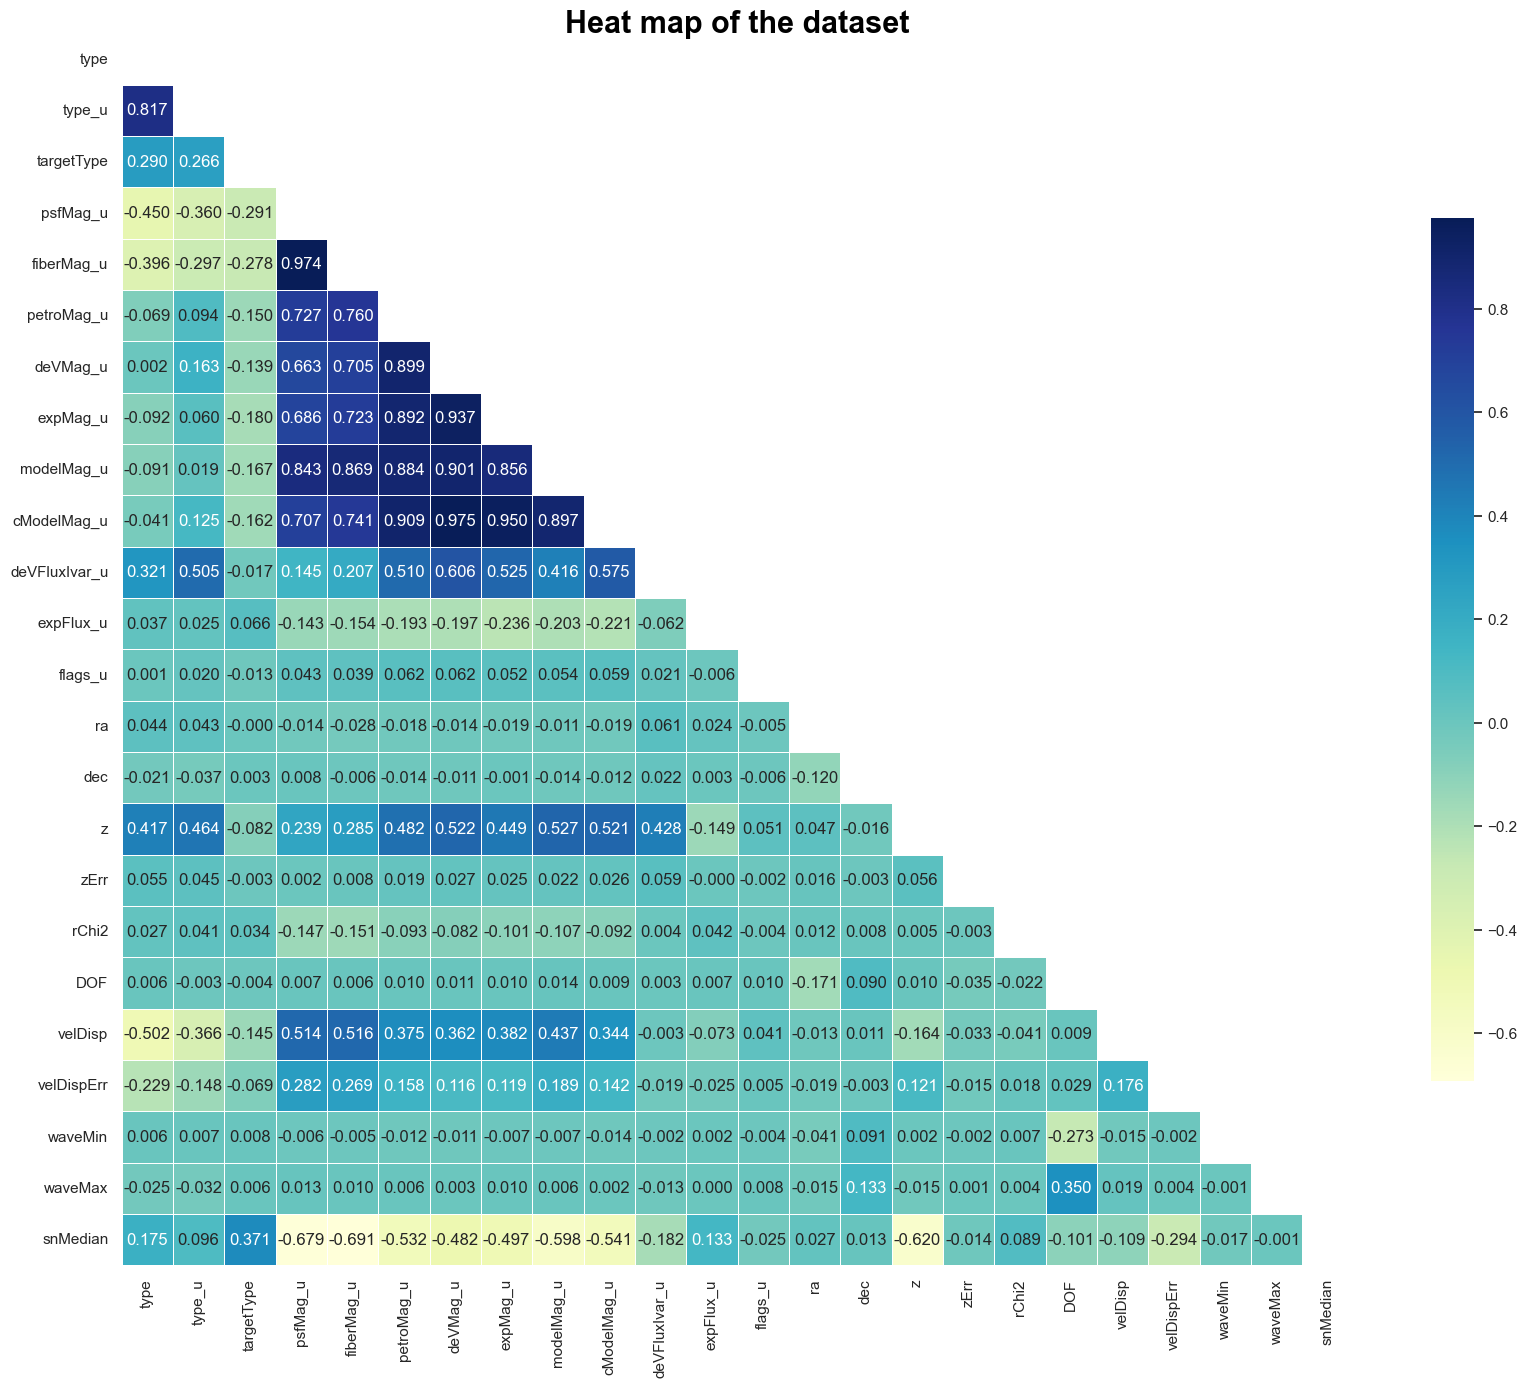

In [185]:
# Selected columns
heatmap_columns = [
    'type', 'type_u', 'targetType',
    'psfMag_u', 'fiberMag_u', 'petroMag_u', 'deVMag_u', 'expMag_u', 'modelMag_u', 'cModelMag_u',
    'deVFluxIvar_u', 'expFlux_u', 'flags_u', 
    'ra', 'dec','z', 'zErr', 'rChi2', 'DOF', 
    'velDisp','velDispErr', 
    'waveMin', 'waveMax', 'snMedian'
]

# Standardization
scaler = StandardScaler()
df_heatmap = df_encoded.copy()
df_heatmap[heatmap_columns] = scaler.fit_transform(df_heatmap[heatmap_columns])

# Compute the correlation matrix
corr = df_heatmap[heatmap_columns].corr(numeric_only= False)

# The mask for lower left triangle 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# The plot 
fig1, ax1 = plt.subplots( figsize=(20, 16) )

# Heatmap
sns.heatmap(corr,  cmap = 'YlGnBu', annot = True, fmt=".3f", 
           linewidth=.5, cbar_kws={ 'orientation': 'vertical', 'shrink': 0.7 } , square=True, mask= mask,)
# Title
ax1.set_title("Heat map of the dataset", fontsize= 22, fontweight= 'heavy', color = 'black', pad= 0.7)

plt.show()

We see that the highest positive value are those between the magnitudes, as they are obviously related. We can notice that the redshift have weak correlations with some attributes, anyway the plot it is not so significative. Maybe after a dimensionality reduction and a more smart choiche of the most significatve variables, we coudl have better results.

## Redshift prediction

### Regression with scikit-learn

We prepared the data by separating the features and the target variable we have to predict. First we will try with the redshift (z).

In [186]:
# Defining the target variable we have to predict 
target = 'z'

# Features preparing
X = df_encoded.drop(columns = [target])
y = df_encoded[target]

Creating instances for the models. We will try with the following Machine Learning algorithms:
- (Multiple) Linear regression 
- Random forest regression
- SVM regressor

I will not perform the Lasso and Ridge regression because the number of features is too high.

In [187]:
lin_reg_z = LinearRegression()
#poly_z = PolynomialFeatures(degree=2)
rand_forest_z = RandomForestRegressor(n_estimators = 10, random_state = 0)
svm_z = SVR(kernel='rbf')

Then we split the data into training and test sets. In this case we splits 80% of the data to training set while 20% of the data to test set. 

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting the model to the training data, then we make the predictions.

In [189]:
# Linear regression
lin_reg_z.fit(X_train, y_train)

y_pred_linear = lin_reg_z.predict(X_test)

In [190]:
# Random forest regression
rand_forest_z.fit(X_train, y_train)

y_pred_rand = rand_forest_z.predict(X_test)

In [191]:
# SVM regression
svm_z.fit(X_train, y_train)

y_pred_svm = svm_z.predict(X_test)

#### Evaluation

Next, the evaluation and analysis of the results.

Here below some useful metrics used for understand the goodness of the model:
- MSE: is influenced heavily by large errors (outliers). A lower value of MSE shows better model performance. Differentiable — can be used as a loss function to be minimised.
- RMSE: large errors have a big effect on the final RMSE. Differentiable.
- MAE: negative errors do not decrease positive errors when summing. Not effected heavily by outliers but not always differentiable
- R^2: describes the proportion of variance of the dependent variable explained by the regression model.

In [192]:
# MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rand = mean_squared_error(y_test, y_pred_rand)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# MAE
mae_linear = mean_absolute_error(y_test,y_pred_linear)
mae_rand = mean_absolute_error(y_test,y_pred_rand)
mae_svm= mean_absolute_error(y_test,y_pred_svm)

# RMSE
rmse_linear = np.sqrt(mse_linear)
rmse_rand = np.sqrt(mse_rand)
rmse_svm = np.sqrt(mse_svm)

# R squared score
r2_linear = r2_score(y_test,y_pred_linear) * 100
r2_rand = r2_score(y_test,y_pred_rand) * 100
r2_svm= r2_score(y_test,y_pred_svm) * 100


# Create a DataFrame from the dictionary
evaluations_dict = {
    'MSE': [mse_linear, mse_rand, mse_svm],
    'MAE': [mae_linear, mae_rand, mae_svm],
    'RMSE': [rmse_linear, rmse_rand, rmse_svm],
    'R-squared': [r2_linear, r2_rand, r2_svm]
}

# Create a list of regression model names
models = ['Linear Regression', 'Random Forest Regression', 'SVM Regression']

# Create a DataFrame with model names as the index
evaluations_df = pd.DataFrame(evaluations_dict, index=models)

In [193]:
evaluations_df

MSE       MAE      RMSE  R-squared
Linear Regression         0.250818  0.354371  0.500817  78.737677
Random Forest Regression  0.000062  0.001846  0.007895  99.994717
SVM Regression            1.124529  0.754402  1.060438   4.671425

#### Plots

From scatter plots of Actual vs Predicted you can tell how well the model is performing by comparing the subest of the original dataset (y_test) with the predicted values (y_pred). For the ideal model, the points should be closer to a diagonal line.

In [194]:
# Create a scatter plot for Actual vs Predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_linear, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_linear), max(y_pred_linear)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted Multiple Linear Regression')

# Show the plot
fig.show()

When the predicted values tend to be higher (above) the perfect line, it means that the model is overestimating the target variable. This might suggests that the model has a positive bias, meaning it predicts values that are higher than the true values on average.

In [195]:
# Create a scatter plot for Actual vs Predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_rand, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_rand), max(y_pred_rand)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted Multiple Linear Regression')

# Show the plot
fig.show()

In [196]:
# Create a scatter plot for Actual vs Predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_svm, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_svm), max(y_pred_svm)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted Multiple Linear Regression')

# Show the plot
fig.show()

Residuals in a statistical or machine learning model are the differences between observed and predicted values of data.
One of the assumption in Linear regression is that the residual should be normally distributed.

In [197]:
# Calculate the residuals (difference between actual and predicted values)
residuals = y_test - y_pred_linear

# Create a histogram of residuals
fig = px.histogram(residuals, title='Histogram of Residuals', labels={'value': 'Residual'}, opacity=0.90)
fig.update_traces(marker_color='#33ADA4') # Change 'purple' to the color you want

# Update layout for better appearance (optional)
fig.update_layout(
    xaxis_title='Residual',
    yaxis_title='Frequency',
    showlegend=False,
    bargap=0.05,
    bargroupgap=0.1
)

# Show the plot
fig.show()

Our model’s residual seems pretty normally distributed, so the model can be considered not biased. We can assest this also from the normal Q-Q plot. This plot is used to determine the normal distribution of errors and for normally distributed data, observations should lie approximately on a straight line.

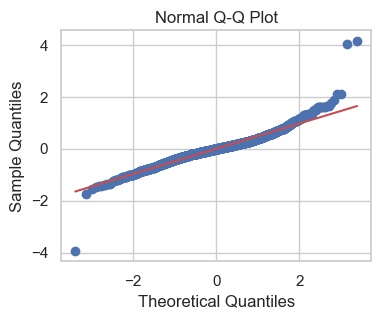

In [198]:
# Create a Normal Q-Q plot
plt.figure(figsize=(4, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Regression + PCA

#### PCA components

I am defining again the target and the features vector to have more clear code. Same for the splitting.

In [199]:
# Defining the target variable we have to predict 
target = 'z'

# Features preparing
X = df_encoded.drop(columns = [target])
y = df_encoded[target]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Extract the features (independent variables) and standardize them.

In [201]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

Since we do not want to use all the principal components, the question now is how many principal components we should use for regression analysis.
I want to understand the optimal number of principal components for keeping the relevant information and not lose important one. I could not put anyvalue in *n_components*, but i want decrease the computational cost, so i will put 150 (which is likewise a high number of componets).

In [202]:
# Generate all the principal compoents 
pca = PCA(n_components = 150)

In [203]:
# Fit the pca on the training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

First i will use the scree plot method in which a drop occurs ('elbow') to point out the optimal number of components. The components appearing after the elbow are and the components with relatively high explained variances are kept.

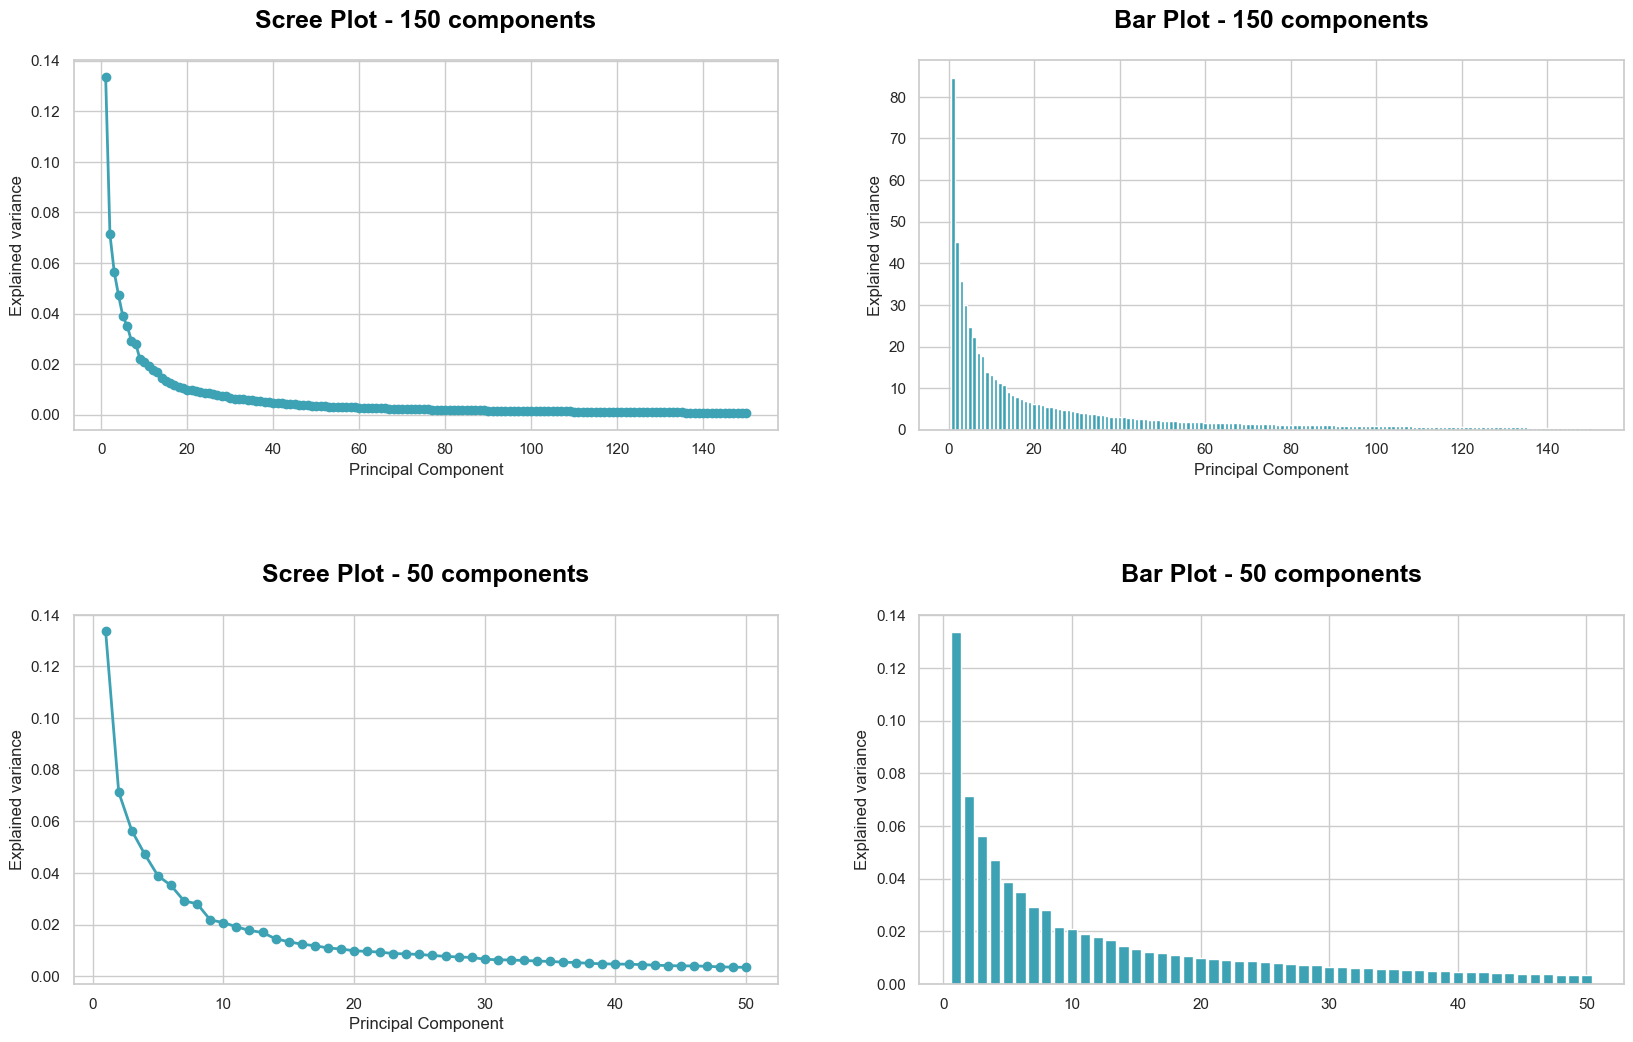

In [204]:
# Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12), gridspec_kw={'hspace': 0.5})

# Plot the first subplot
PC_values = np.arange(pca.n_components_) + 1
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#3ea2b5')
ax1.set_title('Scree Plot - 150 components', fontsize= 18, fontweight= 'heavy', color = 'black', y=1.05, pad=10)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained variance')
ax1.grid(True)

# Plot the second subplot
ax2.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, color='#3ea2b5')
ax2.set_title('Bar Plot - 150 components', fontsize= 18, fontweight= 'heavy', color = 'black', y=1.05, pad=10)
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Explained variance')
ax2.grid(True)

# Plot the third subplot
PC_values = np.arange(50) + 1
explained_variance_ratio = pca.explained_variance_ratio_[:50]
ax3.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='#3ea2b5')
ax3.set_title('Scree Plot - 50 components', fontsize= 18, fontweight= 'heavy', color = 'black', y=1.05, pad=10)
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Explained variance')
ax3.grid(True)

# Plot the fourth subplot
ax4.bar(range(1, 51), explained_variance_ratio, color='#3ea2b5')
ax4.set_title('Bar Plot - 50 components', fontsize= 18, fontweight= 'heavy', color = 'black', y=1.05, pad=10)
ax2.set_xlabel('Principal Component')
ax4.set_ylabel('Explained variance')
ax4.grid(True)

# Show the combined plot
plt.show()

Thanks to these 2 plots we can see that the elbow is among 0 and 50 components. 

Other than this visual analysis, in order to determine the number of principal components we can implement the cross-validation method:
- the `cross_val_score` function is used for cross-validation. It splits the data into multiple subsets (cv) and calculates the RMSE for each fold. 
- The `neg_root_mean_squared_error` scoring parameter indicates that it calculates the negative RMSE, which will be multiplied by -1 to obtain the actual RMSE value.
- `.mean()`:this method calculates the mean of the RMSE values across all folds, giving a single RMSE value for the current principal component.

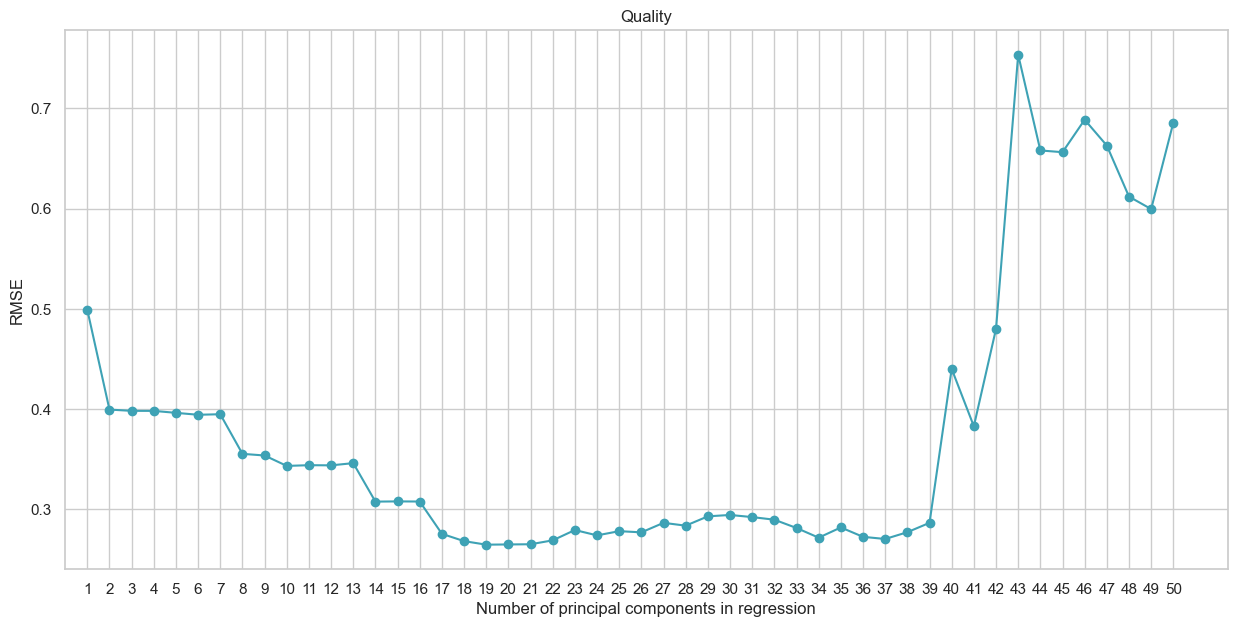

In [205]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, 51):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pca[:,:i], # sUse first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.figure(figsize=(15, 7))
plt.plot(rmse_list, '-o', color='#3ea2b5')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1)
plt.xticks(np.arange(50), np.arange(1, 51))
plt.show()

We see that the training set performance of PCR improves (i.e., RMSE decreases) with more principal components, but then it increases again. We can keep 20 as a good number of principal components.

In [206]:
# Computing the cumulative explained variance  
sum = 0
for i in range(20):
    temp = round(pca.explained_variance_ratio_[i]*100, 2)
    sum += temp
print('Variance:', round(sum), '%')

Variance: 62 %


This code computes and prints the cumulative percentage of variance explained by the first 2030 principal components, giving you an idea of how much of the total variance in the data is captured by these components. So, in order to capture the around the 60% of the variance, 20 components are needed. 

#### Fitting and predicting

In [207]:
# Optimal number of principal components
best_pc_num = 20

A grid search is performed using GridSearchCV to find the best hyperparameters (alphas) for the Lasso and Ridge regression model.

In [208]:
# Define a range of alpha values to search
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Adjust the range as needed

# Define the parameter grid for Ridge and Lasso
param_grid = [{'alpha': alpha_values, 'max_iter': [10000]}]

# Perform grid search for Ridge
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train_pca[:, :best_pc_num], y_train)

# Perform grid search for Lasso
lasso_grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train_pca[:, :best_pc_num], y_train)

# Get the best parameters for Ridge and Lasso
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
best_alpha_lasso = lasso_grid_search.best_params_['alpha']

print("Best Ridge alpha:", best_alpha_ridge)
print("Best Lasso alpha:", best_alpha_lasso)

Best Ridge alpha: 10.0
Best Lasso alpha: 0.01


After determining the best number of principal components to use, we proceed to run PCR (principal component regression) and other models. First we fit the models and we make the predictions.

In [209]:
# Linear Regression
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca[:,:best_pc_num], y_train)

# Ridge and Lasso 
ridge_reg_z = Ridge(alpha=10.0, max_iter=10000)  
lasso_reg_z = Lasso(alpha=0.01, max_iter=10000) 
ridge_reg_z.fit(X_train_pca[:,:best_pc_num],y_train)
lasso_reg_z.fit(X_train_pca[:,:best_pc_num],y_train)

# Random Forestm
rand_reg_pca = RandomForestRegressor()
rand_reg_pca.fit(X_train_pca[:,:best_pc_num], y_train)

# SVM
svm_reg_pca = SVR(kernel= 'rbf')
svm_reg_pca.fit(X_train_pca[:,:best_pc_num], y_train)

# Predict with the first 9 principal components of test set
y_pred_lin_pca = lin_reg_pca.predict(X_test_pca[:,:best_pc_num])
y_pred_ridge_pca = ridge_reg_z.predict(X_test_pca[:,:best_pc_num])
y_pred_lasso_pca= lasso_reg_z.predict(X_test_pca[:,:best_pc_num])
y_pred_rand_pca = rand_reg_pca.predict(X_test_pca[:,:best_pc_num])
y_pred_svm_pca = svm_reg_pca.predict(X_test_pca[:,:best_pc_num])


#### Evaluation with metrics

In [210]:
# MSE
mse_linear = mean_squared_error(y_test, y_pred_lin_pca)
mse_ridge = mean_squared_error(y_test, y_pred_ridge_pca)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_pca)
mse_rand = mean_squared_error(y_test, y_pred_rand_pca)
mse_svm = mean_squared_error(y_test, y_pred_svm_pca)

# MAE
mae_linear = mean_absolute_error(y_test,y_pred_lin_pca)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge_pca)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso_pca)
mae_rand = mean_absolute_error(y_test,y_pred_rand_pca)
mae_svm= mean_absolute_error(y_test,y_pred_svm_pca)

# RMSE
rmse_linear = np.sqrt(mse_linear)
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_rand = np.sqrt(mse_rand)
rmse_svm = np.sqrt(mse_svm)


# R squared score
r2_linear = r2_score(y_test,y_pred_lin_pca) * 100
r2_ridge = r2_score(y_test,y_pred_ridge_pca) * 100
r2_lasso = r2_score(y_test,y_pred_lasso_pca) * 100
r2_rand = r2_score(y_test,y_pred_rand_pca) * 100
r2_svm= r2_score(y_test,y_pred_svm_pca) * 100


# Create a DataFrame from the dictionary
evaluations_dict = {
    'MSE': [ mse_linear, mse_ridge, mse_lasso,  mse_rand, mse_svm],
    'MAE': [ mae_linear, mae_ridge, mae_lasso, mae_rand, mae_svm],
    'RMSE': [rmse_linear, rmse_ridge, rmse_lasso, rmse_rand, rmse_svm],
    'R-squared': [r2_linear,r2_ridge, r2_lasso ,r2_rand, r2_svm]
}

# Create a list of regression model names
models = ['Linear Regression', 'Ridge Regression ', 'Lasso Regression', 'Random Forest Regression', 'SVM Regression']

# Create a DataFrame with model names as the index
evaluations_df = pd.DataFrame(evaluations_dict, index=models)
evaluations_df = evaluations_df.round(3)

In [211]:
evaluations_df

MSE    MAE   RMSE  R-squared
Linear Regression         0.054  0.158  0.233     95.403
Ridge Regression          0.054  0.158  0.233     95.404
Lasso Regression          0.054  0.157  0.231     95.459
Random Forest Regression  0.045  0.145  0.212     96.195
SVM Regression            0.090  0.149  0.300     92.386

The values that came out of the regression model are suggesting the PCR perfomed well on the reduced dataset (20 components).

#### Plots

In this plot we compare the actual values against the predicted ones. We see that the model has a better performance with respect to the Linear Regression without the PCA.

In [212]:
# Create a scatter plot for Actual vs Predicted with PCR
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_lin_pca, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_lin_pca), max(y_pred_lin_pca)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted PCR')

# Show the plot
fig.show()

In [213]:
# Create subplots 
fig = make_subplots(rows=1, cols=2, subplot_titles=('Ridge Regression Model', 'Lasso Regression Model'))

# Scatter plot for Model 1
fig.add_trace(go.Scatter(x=y_test, y=y_pred_ridge_pca, mode='markers', name='Ridge Regression Model',
                         marker=dict(color='#33ADA4')), row=1, col=1)

# Scatter plot for Model 2
fig.add_trace(go.Scatter(x=y_test, y=y_pred_lasso_pca, mode='markers', name='Ridge Regression Model',
                         marker=dict(color='#2b8cbe')), row=1, col=2)

# Perfect Prediction Line for both subplots
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=2)

# Set axes labels and title
fig.update_xaxes(title_text='Actual Values', row=1, col=1)
fig.update_xaxes(title_text='Actual Values', row=1, col=2)
fig.update_yaxes(title_text='Predicted Values', row=1, col=1)
fig.update_yaxes(title_text='Predicted Values', row=1, col=2)
fig.update_layout(title='Ridge and Lasso Actual vs Predicted', showlegend=False)

# Show the plot
fig.show()

In [214]:
# Create a scatter plot for Actual vs Predicted with PCR
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_rand_pca, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_rand_pca), max(y_pred_rand_pca)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted with Random Forest and PCA')

# Show the plot
fig.show()

In [215]:
# Create a scatter plot for Actual vs Predicted with PCR
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred_svm_pca, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4'), opacity=0.65))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_pred_svm_pca), max(y_pred_svm_pca)],
                         mode='lines', line=dict(color='#ef3b2c', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted with SVM and PCA')

# Show the plot
fig.show()

### Regression and KFolds Cross Validation

Here I attempt to fit the Regression models we have sees with 5-fold cross-validation, in order to check whether or not the results are better than before.
Moreover the cross validation is a useful technique to mitigate the effect of overfitting (and we have stated the my models are suffering of it).

In [224]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0, max_iter=10000),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(kernel='rbf'),
}

# Initialize empty dictionaries to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-squared': [],
}

# Define the list of scoring metrics for cross-validation
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

# Perform cross-validation and calculate metrics for each model
for model_name, model in models.items():
    # Computing the metrics
    cv_results = cross_validate(model, X_train_pca[:, :best_pc_num], y_train, cv=5, scoring=scoring_metrics)

    # Append metrics to the dictionary with the appropriate transformations
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['MSE'].append(-cv_results['test_neg_mean_squared_error'].mean())
    evaluation_metrics['MAE'].append(-cv_results['test_neg_mean_absolute_error'].mean())
    evaluation_metrics['RMSE'].append(-cv_results['test_neg_root_mean_squared_error'].mean())
    evaluation_metrics['R-squared'].append(cv_results['test_r2'].mean() * 100)

# Create a DataFrame from the dictionary
cross_validation_results = pd.DataFrame(evaluation_metrics)
cross_validation_results.set_index('Model', inplace=True)
cross_validation_results = cross_validation_results.round(3)

In [225]:
# Results of cross validation
cross_validation_results

MSE    MAE   RMSE  R-squared
Model                                            
Linear Regression  0.071  0.174  0.265     94.455
Ridge              0.071  0.174  0.265     94.456
Lasso              0.070  0.174  0.265     94.481
Random Forest      0.066  0.147  0.255     94.822
SVM                0.150  0.126  0.385     88.240

In [226]:
# Previous results 
evaluations_df

MSE    MAE   RMSE  R-squared
Linear Regression         0.054  0.158  0.233     95.403
Ridge Regression          0.054  0.158  0.233     95.404
Lasso Regression          0.054  0.157  0.231     95.459
Random Forest Regression  0.045  0.145  0.212     96.195
SVM Regression            0.090  0.149  0.300     92.386

We can observe that the R-squared values obtained are generally lower than the ones obtained witout the cross validation (especially for the SVM). Same for the errors: this could confirm that the previous models are suffering of overiftting.

However the results are still good, so that could be mean that our model are working.

For the visualization of predictions obtained from different models, we could use `cross_val_predict` function, that has a similar interface to `cross_val_score`, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. 

### Evaluation with KFolds cross-validation 

I will use KFolds cross-validation with 10 fold to evaluate the generalization ability of some of the model used (Linear Regression, Lasso, Ridge and SVM). Within each fold we will estimate the training and test error using the training and test sets, respectively.

A remainder of what overfitting and underfitting are:
- Overfitting is when the model’s error on the training set (i.e. during training) is very low but then, the model’s error on the test set (i.e. unseen samples) is large
- Underfitting is when the model’s error on both the training and test sets (i.e. during training and testing) is very high.

(Source: Medium)

In [222]:
'''
# Optimal number of principal components
best_pc_num = 20

# Number of folds
kf = KFold(n_splits=10)

list_training_error = []
list_testing_error = []

X_scaled = StandardScaler().fit_transform(X)
pca_model = PCA(n_components = best_pc_num)
X_pca = pca_model.fit_transform(X_scaled)

for train_index, test_index in kf.split(X):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)
'''

'\n# Optimal number of principal components\nbest_pc_num = 20\n\n# Number of folds\nkf = KFold(n_splits=10)\n\nlist_training_error = []\nlist_testing_error = []\n\nX_scaled = StandardScaler().fit_transform(X)\npca_model = PCA(n_components = best_pc_num)\nX_pca = pca_model.fit_transform(X_scaled)\n\nfor train_index, test_index in kf.split(X):\n    X_train, X_test = X_pca[train_index], X_pca[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    model = LinearRegression()\n    model.fit(X_train, y_train)\n    y_train_data_pred = model.predict(X_train)\n    y_test_data_pred = model.predict(X_test)\n    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) \n    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)\n    list_training_error.append(fold_training_error)\n    list_testing_error.append(fold_testing_error)\n'

Let's plot the MAE of the training phase and the MAE of the testing phase.

In [223]:
'''
# Create a figure with a larger size (e.g., 14x7 inches)
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Comparing the errors - Linear Regression', fontsize=18, weight='bold' ,y=1.05)  # Increase font size and adjust y position

# Create the first subplot (ax1)
ax1 = fig.add_subplot(121)
ax1.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
ax1.set_xlabel('number of fold')
ax1.set_ylabel('training error')
ax1.set_xticks(range(1, kf.get_n_splits() + 1))
ax1.set_yticks(np.linspace(min(list_training_error), max(list_training_error), 10)) 
ax1.set_title('Training error across folds')


# Create the second subplot (ax2)
ax2 = fig.add_subplot(122)
ax2.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
ax2.set_xlabel('number of fold')
ax2.set_ylabel('testing error')
ax2.set_xticks(range(1, kf.get_n_splits() + 1))
ax2.set_yticks(np.linspace(min(list_testing_error), max(list_testing_error), 10))  
ax2.set_title('Testing error across folds')

# Ensure proper spacing and layout for subplots
plt.tight_layout()

# Show the figure
plt.show()
'''

"\n# Create a figure with a larger size (e.g., 14x7 inches)\nfig = plt.figure(figsize=(14, 6))\nfig.suptitle('Comparing the errors - Linear Regression', fontsize=18, weight='bold' ,y=1.05)  # Increase font size and adjust y position\n\n# Create the first subplot (ax1)\nax1 = fig.add_subplot(121)\nax1.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')\nax1.set_xlabel('number of fold')\nax1.set_ylabel('training error')\nax1.set_xticks(range(1, kf.get_n_splits() + 1))\nax1.set_yticks(np.linspace(min(list_training_error), max(list_training_error), 10)) \nax1.set_title('Training error across folds')\n\n\n# Create the second subplot (ax2)\nax2 = fig.add_subplot(122)\nax2.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')\nax2.set_xlabel('number of fold')\nax2.set_ylabel('testing error')\nax2.set_xticks(range(1, kf.get_n_splits() + 1))\nax2.set_yticks(np.linspace(min(list_testing_error), max(list_testing_error), 10))  \nax2.set_ti

### Regression with statsmodels

Here i tried to apply the Linear Regression with the statmodels pacakge too, but i obtained poor results with respect to the prevoious methodologies. Indeed, the inpact of the dimensionality reduction is relevant.

In [ ]:
# Define target variable
y_ols = df_encoded['z']

# Define predictor variables
X_ols = df_encoded.drop(columns=['z'])

# Split the data into training and testing sets
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y_ols, test_size=0.3, random_state=42)

# Fit a linear regression model
model = sm.OLS(y_train_ols, sm.add_constant(X_train_ols)).fit()

# View the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     595.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:37:06   Log-Likelihood:                -7587.9
No. Observations:                6981   AIC:                         1.521e+04
Df Residuals:                    6963   BIC:                         1.534e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
objID                -1.428e-06 

## Type prediction  

#### Classification

Here I will perform several classification model on the attribute type. The first is the Logistic Regression.

In [271]:
# Defining the target variable we have to predict 
target = 'type'

# Features preparing
X_cls = df_encoded.drop(columns = [target])
y_cls = df_encoded[target]

# Splitting 
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardization
# Standardize the data to have a mean of ~0 and a variance of 1
X_train_cls = StandardScaler().fit_transform(X_train_cls)
X_test_cls = StandardScaler().fit_transform(X_test_cls)

In [272]:
# New instance of pca with the stated optimal number of featues 
pca = PCA(n_components = 20)

# Fit the pca on the training and testing data
X_train_cls_pca = pca.fit_transform(X_train_cls)
X_test_cls_pca = pca.transform(X_test_cls)

In [273]:
# The model
logreg = LogisticRegression(max_iter= 10000, random_state = 42)

# Fit the model with data
logreg.fit(X_train_cls_pca, y_train_cls)
rand_reg_pca.fit(X_train_cls_pca[:,:20], y_train)
y_pred_rand_pca = rand_reg_pca.predict(X_test_pca[:,:20])


# Prediction
y_pred_logreg = logreg.predict(X_test_cls_pca)

#### Evaluation

In [274]:
confusion_matrix(y_pred_logreg, y_test_cls)

array([[1708,    1],
       [   8,  278]])

In [275]:
accuracy_score(y_test_cls, y_pred_logreg)

0.9954887218045113

In [286]:
recall_score(y_test_cls, y_pred_logreg, pos_label=3)

0.9953379953379954

In [291]:
fbeta_score(y_test_cls, y_pred_logreg, beta=0.5, pos_label=3)

0.998596819457437

In [292]:
# Convert the labels to binary format (6 is the positive class)
y_test_binary = (y_test_cls == 3).astype(int)

# Calculate predicted probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test_cls_pca)[:, 1]

# Compute the ROC curve with the specified positive class
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)